# Perceptron

In machine learning, perceptron is a single layer neural network. It is an algorithm for supervised learning of binary classifiers. A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class. It is a type of linear classifier, which is a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. As we can see from the picture below, the line linearly seperates the two different classes.

<img src="https://miro.medium.com/max/1400/1*xsR57_PO8U7PB_ItLslLmA.png" width="450" height="300"/>

There are generally four parts to implement perceptron, including inputing $X$ values and a constant 1, weights and bias, weighted sum, and finally an activation function. Weights shows the strength of the particular node. A bias value allows us to shift the activation function curve up or down. The algorithm is illustrated as below.

<img src="https://miro.medium.com/max/4800/1*n6sJ4yZQzwKL9wnF5wnVNg.png" width="620" height="630"/>

### Detailed steps to implement perceptron:
1. Define $\bar{X}$ to be a vector containing $x_1$ through $x_n$ and a constant 1.
3. Compute the weighted sum $\sum = w^T \bar{X}$ plus a bias term. The weights $w$ are obtained through gradient descent.
3. Input the weighted sum to an activation function, and then the activation function will give the output $\hat{y} = sign(w^T \bar{X})$.

---
# My Implementation on Penguins Dataset

Since perceptron is used for linearly seperable data, I found a penguins dataset that has this feature. It is known as a substitute of the iris dataset. There are 6 predictor variables and 1 target variable "species".

#### Predictor variables:
1. island
2. culmen_length_mm
3. culmen_depth_mm
4. flipper_length_mm
5. body_mass_g
6. sex

#### Target variable:
1. species (three categories: "Adelie", "Chinstrap" and "Gentoo")

For impletation of the algorithm, we will assign 1 through 3 to "Adelie", "Chinstrap" and "Gentoo" respectively.

---
# Libraries Used

The following packages are used to implement this algorithm.

1. [numpy](https://numpy.org/doc/)
2. [pandas](https://pandas.pydata.org/docs/)
3. [matplotlib](https://matplotlib.org/)
4. [seaborn](https://seaborn.pydata.org/)

---
# Coding Part

In [1]:
# Import the necassary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns # This is used for pair plots

Read the penguins data.

In [2]:
df = pd.read_csv('penguins.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


We notice that there are some NaNs in the dataset, so let's drop all the NaNs.

In [4]:
df = df.dropna()

Now, let's take a look at some features of the dataset.

In [5]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


Then, let's see how many distinct species there are. The penguins can be categorized into three species: "Adelie", "Chinstrap" and "Gentoo".

In [6]:
df.species.drop_duplicates()

0         Adelie
152    Chinstrap
220       Gentoo
Name: species, dtype: object

For impletation of the algorithm, we will assign 1 through 3 to "Adelie", "Chinstrap" and "Gentoo" respectively.

In [7]:
df.species.replace(('Adelie', 'Chinstrap', 'Gentoo'), (1, 2, 3), inplace = True)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,1,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,1,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,1,Torgersen,39.3,20.6,190.0,3650.0,MALE


Then, generate pair plots using seaborn from sns.

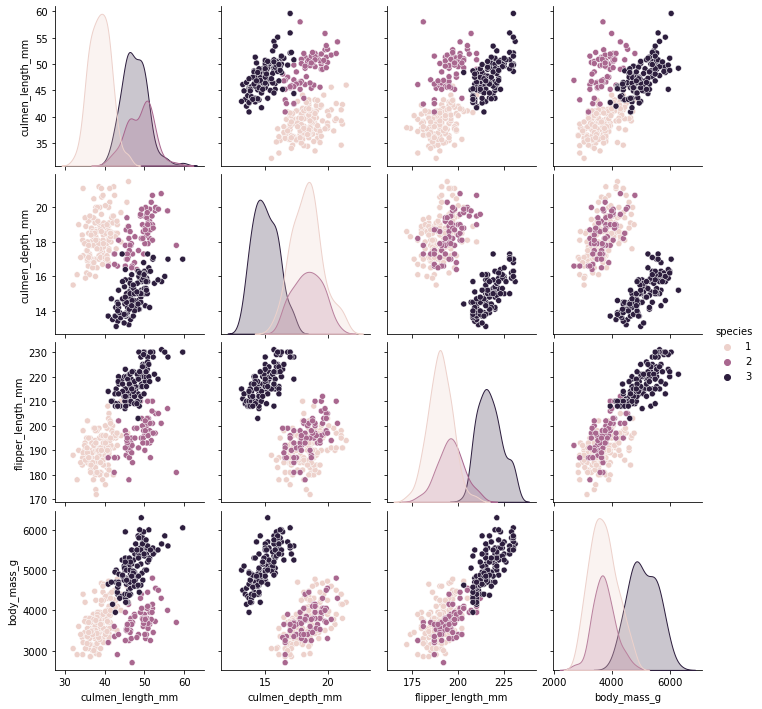

In [8]:
sns.pairplot(df, hue = 'species')

#### We notice that there are two cases of linear seperation:
1. "culmen_depth_mm" against "flipper_length_mm"
2. "culmen_depth_mm" against "body_mass_g"

Let's just focus on "culmen_depth_mm" against "flipper_length_mm". We see that both species 1 (Adelie) and 2 (Chinstrap) are clearly seperated from species 3 (Gentoo). We choose species 1 and species 3 to implement the perceptron algorithm.

<AxesSubplot:xlabel='culmen_depth_mm', ylabel='flipper_length_mm'>

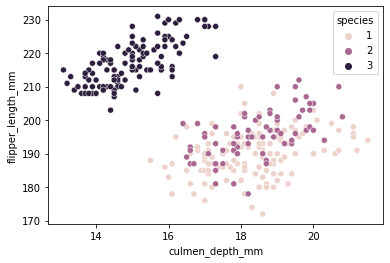

In [9]:
sns.scatterplot(data = df,
                x = 'culmen_depth_mm',
                y = 'flipper_length_mm',
                hue = 'species')

For y, we extract species 1 and 3. For X, we extract variables 'culmen_depth_mm' and 'flipper_length_mm' for species 1 and 3.

In [1]:
y = df[(df['species'] == 1)|(df['species'] == 3)]['species'].to_numpy()
X = df[(df['species'] == 1)|(df['species'] == 3)][['culmen_depth_mm','flipper_length_mm']].to_numpy()

NameError: name 'df' is not defined

Reassign values 1 and -1 to species 1 and 3.

In [11]:
for i, label in enumerate(y):
    if label == 1.0:
        y[i] = 1.0
    elif label == 3.0:
        y[i] = -1.0

In [12]:
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

### Adding bias

$\bar{X}$ is created by appending constant ones to $X$. The constant ones are used for bias.

In [13]:
X_bar = []
for x in X:
    X_bar.append(np.append(x,np.ones(1)))
X_bar = np.array(X_bar)
X_bar[0:10]

array([[ 18.7, 181. ,   1. ],
       [ 17.4, 186. ,   1. ],
       [ 18. , 195. ,   1. ],
       [ 19.3, 193. ,   1. ],
       [ 20.6, 190. ,   1. ],
       [ 17.8, 181. ,   1. ],
       [ 19.6, 195. ,   1. ],
       [ 17.6, 182. ,   1. ],
       [ 21.2, 191. ,   1. ],
       [ 21.1, 198. ,   1. ]])

### Visualization of target variables and target species

Plot only "culmen_depth_mm" against "flipper_length_mm" for species 1 and 3.

Text(0.5, 1.0, 'culmen_depth_mm vs flipper_length_mm')

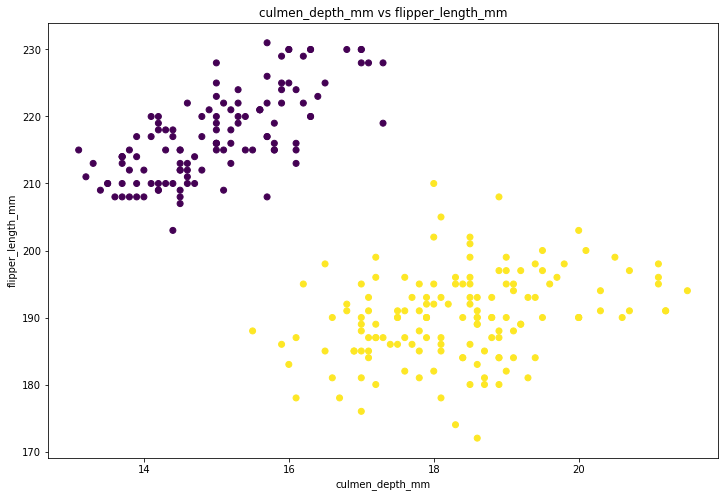

In [14]:
plt.figure(figsize = (12,8))
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.xlabel('culmen_depth_mm')
plt.ylabel('flipper_length_mm')
plt.title("culmen_depth_mm vs flipper_length_mm")

### Activation function

Define a sign function and a loss function:

$L = \frac{1}{2}\sum_{i = 1}^{n}(x_i \hat{w}_i - y_i)^2$

In [15]:
def sign(x, y):
    if x @ y > 0:
        return 1.0
    else:
        return -1.0
    
def L(w, features = X_bar, labels = y):
    return sum(.5*(sign(w, x) - labels[i])**2 for i, x in enumerate(features))

### Gradient descent

Define a function for gradient descent. The gradient descent helps correct the weights through iterations. The epochs is the number of iterations. We set it to be 1,000. The $\alpha$ is the learning rate. The initial weights for $x_1$, $x_2$ and bias are sampled randomly. These weights will be corrected, so the initial values don't matter.

Through gradient descent, the $w_{n+1} = w_n - \alpha(sign(w^T\bar{X}) - y)\bar{X}$.

In [16]:
def grad_approx(w, x, y):
    return(sign(w,x) - y)*x
# Set epochs
epochs = 1000
# Set the learning rate alpha
alpha = 0.5
# Sample initial weight for x1, x2, bias
w = np.random.rand(3)

In [17]:
print(f"The loss before implementing stochastic approx gradient descent = {L(w)}")

The loss before implementing stochastic approx gradient descent = 240.0


Run through the iterations and define a function to store the loss for each iteration.

In [18]:
losses = []
for _ in range(epochs):
    for _ in range(70):
        random_index = np.random.randint(len(y))
        w = w - alpha*grad_approx(w, X_bar[random_index], y[random_index])
    losses.append(L(w))

Plot the loss for each iteration. We see that the loss decreases significantly after a few iterations.

Text(0, 0.5, 'Loss')

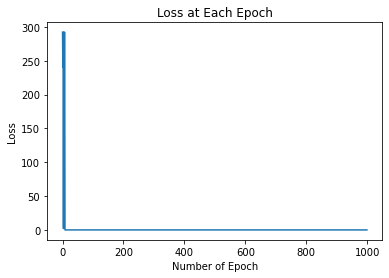

In [19]:
plt.plot(losses)
plt.title('Loss at Each Epoch')
plt.xlabel('Number of Epoch')
plt.ylabel('Loss')

### Visualiztion of the result

Finally, we plot the seperation line to see how well the line seperates the two sepecies.

Text(0.5, 1.0, 'Penguins Species Plot')

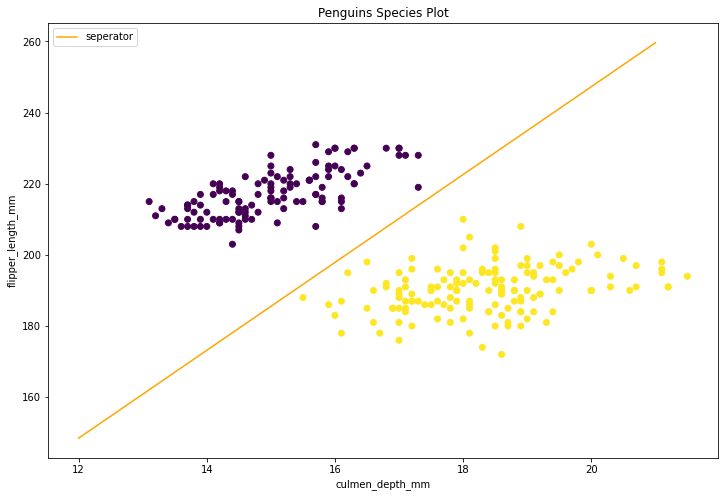

In [20]:
domain = np.arange(12, 22, 1)
line = [(w[0]*x + w[2])/-w[1] for x in domain]

plt.figure(figsize = (12,8))
plt.scatter(X_bar[:, 0], X_bar[:, 1], c = y)

plt.plot(domain,
         line,
         label = 'seperator',
         color = 'orange')

plt.xlabel('culmen_depth_mm')
plt.ylabel('flipper_length_mm')

plt.legend()
plt.title("Penguins Species Plot")

The seperation line successfully seperates species 1 (Adelie) and species 3 (Gentoo).

---
# References

Perceptron. Wikipedia. https://en.wikipedia.org/wiki/Perceptron

Sharma, Sagar. What the hell is perceptron? https://towardsdatascience.com/what-the-hell-is-perceptron-626217814f53